<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/MSPA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [62]:
data = {'name': ['shreya', 'sanika', 'ansh', 'ayush', 'sejal', 'rutuja', 'yash', 'sneha'],
        'age': [35, 62, 48, 22, 71, 55, 28, 68],
        'gender': ['Female', 'female', 'Male', 'Male', 'Female', 'female', 'Male', 'Female'],
        'medical condition': ['Diabetes', 'Heart Disease', 'Diabetes', 'Asthma', 'Heart Disease', 'Diabetes', 'Asthma', 'Heart Disease'],
        'doctor': ['Dr. Nikhade', 'Dr. Muley', 'Dr. Nikhade', 'Dr. Jain', 'Dr. Muley', 'Dr. Nikhade', 'Dr. Jain', 'Dr. Muley'],
        'hospital': ['City General', 'County Clinic', 'City General', 'State Hospital', 'County Clinic', 'City General', 'State Hospital', 'County Clinic']}
df = pd.DataFrame(data)
display(df)

,name,age,gender,medical condition,doctor,hospital
0,shreya,35,Female,Diabetes,Dr. Nikhade,City General
1,sanika,62,female,Heart Disease,Dr. Muley,County Clinic
2,ansh,48,Male,Diabetes,Dr. Nikhade,City General
3,ayush,22,Male,Asthma,Dr. Jain,State Hospital
4,sejal,71,Female,Heart Disease,Dr. Muley,County Clinic
5,rutuja,55,female,Diabetes,Dr. Nikhade,City General
6,yash,28,Male,Asthma,Dr. Jain,State Hospital
7,sneha,68,Female,Heart Disease,Dr. Muley,County Clinic


In [37]:
print("\nMissing Values before handling:")
print(df.isnull().sum())

for column in df.select_dtypes(include=['number']).columns:
    df[column].fillna(df[column].median(), inplace=True)
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
print("\nMissing Values after handling:")
print(df.isnull().sum())



Missing Values before handling:
name                 0
age                  0
gender               0
medical condition    0
doctor               0
hospital             0
dtype: int64

Missing Values after handling:
name                 0
age                  0
gender               0
medical condition    0
doctor               0
hospital             0
dtype: int64


<ipython-input-37-5f39f80f8629>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-37-5f39f80f8629>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [42]:
categorical_features = ['name','gender', 'medical condition']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)



In [43]:
clustering_features = ['age'] + [col for col in df_encoded.columns if col not in df.columns]
X = df_encoded[clustering_features].copy()

In [44]:
scaler = StandardScaler()
X['age'] = scaler.fit_transform(X[['age']])

In [46]:
inertia = []
range_n_clusters = range(1, 9)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

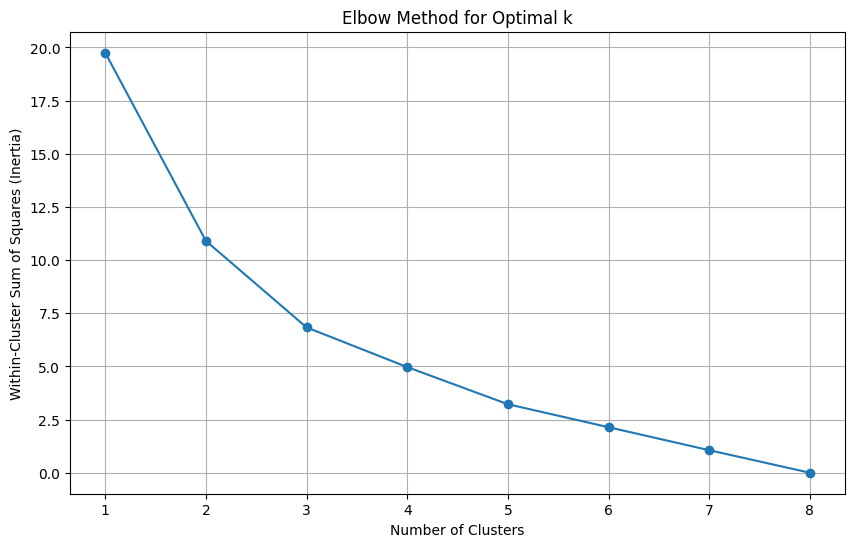

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.grid(True)
plt.show()

In [53]:
optimal_k = 3

In [54]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

In [55]:
print("\nCluster Characteristics (Mean of numerical features and mode of categorical features):")
for cluster_num in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_num]
    print(f"\nCluster {cluster_num}:")
    print(f"  Average Age: {cluster_data['age'].mean():.2f}")
    for col in ['gender', 'medical condition', 'doctor', 'hospital']:
        print(f"  Mode {col}: {cluster_data[col].mode()[0] if not cluster_data[col].mode().empty else None}")
    print(f"  Number of patients: {len(cluster_data)}")

print("\nCluster Counts:")
print(df['Cluster'].value_counts())


Cluster Characteristics (Mean of numerical features and mode of categorical features):

Cluster 0:
  Average Age: 51.50
  Mode gender: Male
  Mode medical condition: Diabetes
  Mode doctor: Dr. Smith
  Mode hospital: City General
  Number of patients: 2

Cluster 1:
  Average Age: 67.00
  Mode gender: Male
  Mode medical condition: Heart Disease
  Mode doctor: Dr. Jones
  Mode hospital: County Clinic
  Number of patients: 3

Cluster 2:
  Average Age: 28.33
  Mode gender: Female
  Mode medical condition: Asthma
  Mode doctor: Dr. Lee
  Mode hospital: State Hospital
  Number of patients: 3

Cluster Counts:
Cluster
2    3
1    3
0    2
Name: count, dtype: int64


In [56]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(data=X_pca, columns=['principal_component_1', 'principal_component_2'])
df_clustered_pca = pd.concat([df, df_pca], axis=1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


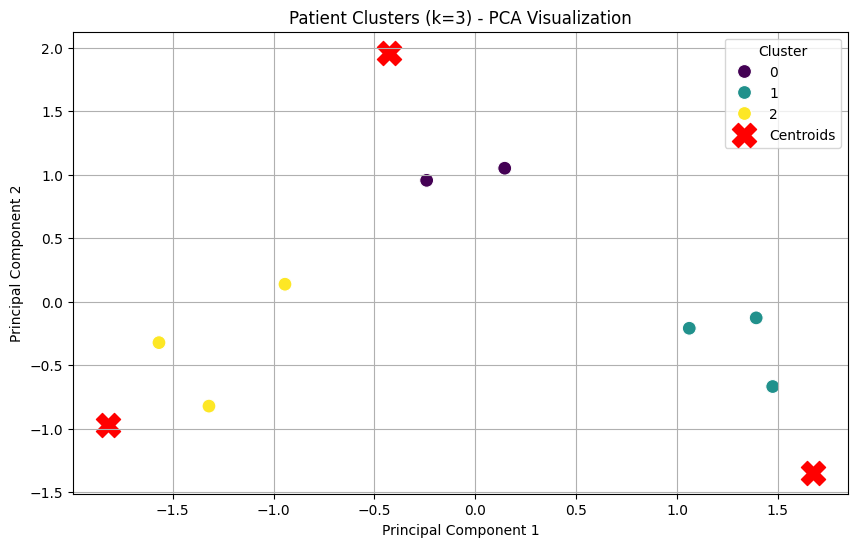

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='Cluster', data=df_clustered_pca, palette='viridis', s=100)

scaler = StandardScaler()
scaler.fit(X)
cluster_centers_pca = pca.transform(scaler.transform(kmeans.cluster_centers_))

plt.scatter(cluster_centers_pca[:, 0],
            cluster_centers_pca[:, 1],
            marker='X', s=300, color='red', label='Centroids')

plt.title(f'Patient Clusters (k={optimal_k}) - PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [66]:
df_predict = df.copy()
X = df_predict.drop('medical condition', axis=1)
y = df_predict['medical condition']


In [67]:
X = pd.get_dummies(X, drop_first=True)


In [69]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split

df_predict = df.copy()
X = df_predict.drop('medical condition', axis=1)
y = df_predict['medical condition']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
y_pred = model.predict(X_test)


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the disease : {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the disease : 1.00

Classification Report:
               precision    recall  f1-score   support

     Diabetes       1.00      1.00      1.00         2
Heart Disease       1.00      1.00      1.00         1

     accuracy                           1.00         3
    macro avg       1.00      1.00      1.00         3
 weighted avg       1.00      1.00      1.00         3

